# Feedback de los modelos

Ciertos modelos como la regresión o arboles se dicen 'Interpretables', esto quiere decir que los resultados de los modelos podemos sacar conclusiones o 'insights'.

En particular la regresión Lasso es interpretable:
    * Mientras mas grande el coeficiente para un feature, mas relevante es esta para la regresion.
    * La regresion Lasso trata de seleccionar un pequeño número de features relevantes.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X = pd.read_csv('./X.csv')
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)
X = X.drop('gross', axis=1)
X.head()

production_budget    title_year  aspect_ratio    duration.1  \
0        425000000.0  2.009000e+03  1.780000e+00  1.780000e+02   
1        306000000.0  5.911656e+08  5.911656e+08  5.911656e+08   
2        300000000.0  2.007000e+03  2.350000e+00  1.690000e+02   
3        300000000.0  2.015000e+03  2.350000e+00  1.480000e+02   
4        275000000.0  2.012000e+03  2.350000e+00  1.640000e+02   

   cast_total_facebook_likes        budget  imdb_score  
0                     4834.0  2.370000e+08         7.9  
1                      143.0  5.911656e+08         7.1  
2                    48350.0  3.000000e+08         7.1  
3                    11700.0  2.450000e+08         6.8  
4                   106759.0  2.500000e+08         8.5

In [16]:
from sklearn.linear_model import Lasso
model = Lasso()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
# Scikit lear viene con buenos defaults para los modelos y estimadores
# 75 porciento de entrenamiento
len(X_train)/len(X)

0.75

In [19]:
model.fit(X_train, y_train)

/home/mariocastro/JupyterProjects/mlproject-python/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
model.score(X_test, y_test)

0.5952786734772142

In [21]:
#P Parametros de la regresion lineal
print(model.coef_)
len(model.coef_)

[ 2.85728744e+00 -2.04651840e+00  7.13536467e-01  2.55858651e+00
  3.01051925e+02 -5.73987092e-03  2.63380142e+07]


7

In [22]:
# Para reducir los exponenciales de arriba
# Ordenes de magnitud si son dos decimales u otros y dejando la parte entera
var = np.floor(np.log10(np.abs(model.coef_)))

# Con esto puedes ver, cual feature es mas importante, por si decide la reduccion de dimensionalidad.

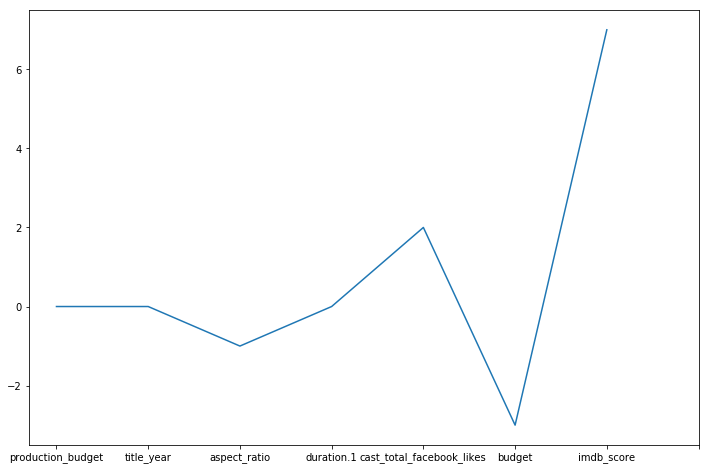

In [23]:
# Plotting
plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(var)
plt.xticks(np.arange(8), list(X.columns));

# Correlacion enrtre variables

In [24]:
# La correlacion entre cada feature con la variable objetivo, es decir si alguna de nuestras features tienen
# grantidad de correlacion con la variable objetivo es una feature informativa

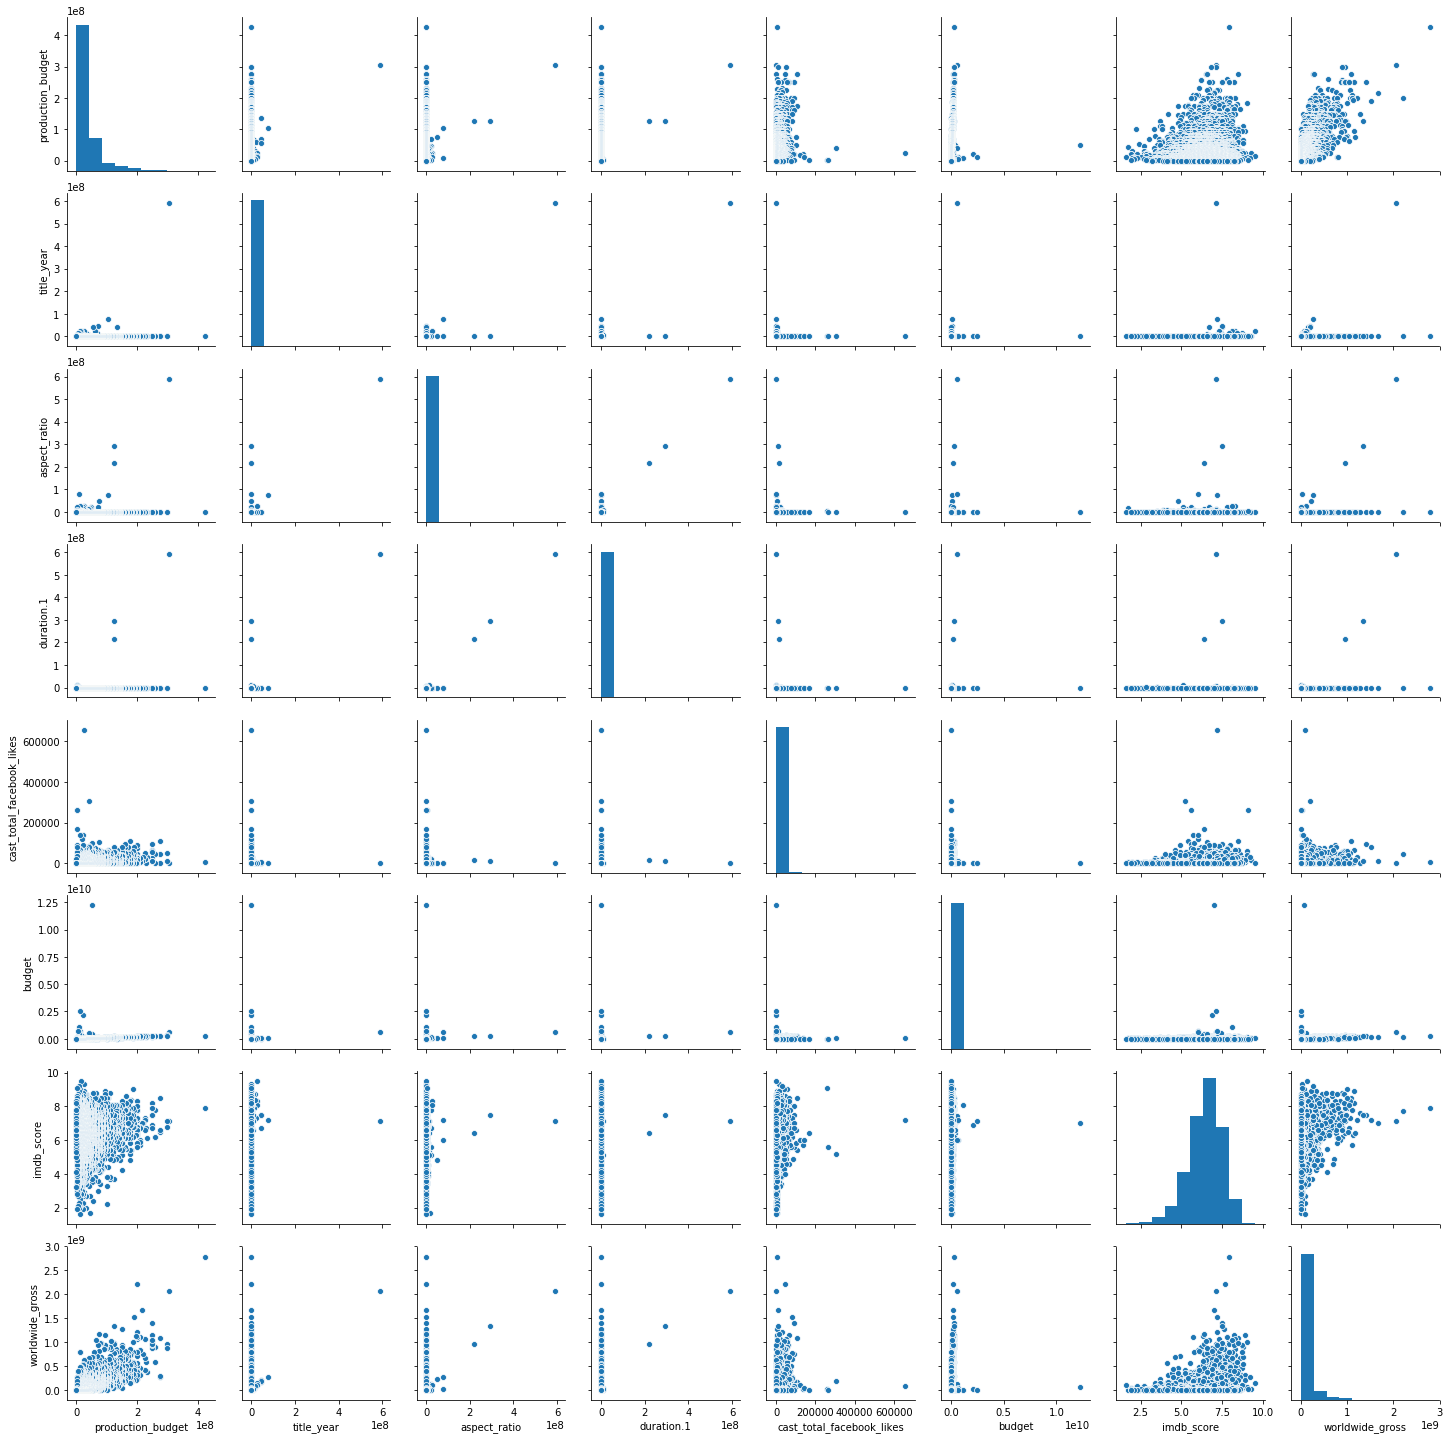

In [25]:
import seaborn as sns
Z = pd.concat([X, y], axis=1)
sns.pairplot(Z)
# Diagonal son distribuciones
# Las demas son scatter plots (grafican en parte la correlacion con las variables)

Como podemos ver la variable objetivo WorldWide Gross tiene mas relacion con Production_budget y imbd score, y con el gross que es obvio, esto se puede ver por que tenemos mejor marcada una diagonal con todos los datos, a diferencia de las demas qeu la mayoria de los datos estan en vertical

In [26]:
# agregamos la clase, entre mas grande sea la clase es mas costosa la pelicula ejemplo(Avatar deberia ser clase 7)
clase = pd.cut(X['production_budget'], 7).cat.codes.rename('classe')
z2 = pd.concat([X, clase], axis=1)
z2.head()

production_budget    title_year  aspect_ratio    duration.1  \
0        425000000.0  2.009000e+03  1.780000e+00  1.780000e+02   
1        306000000.0  5.911656e+08  5.911656e+08  5.911656e+08   
2        300000000.0  2.007000e+03  2.350000e+00  1.690000e+02   
3        300000000.0  2.015000e+03  2.350000e+00  1.480000e+02   
4        275000000.0  2.012000e+03  2.350000e+00  1.640000e+02   

   cast_total_facebook_likes        budget  imdb_score  classe  
0                     4834.0  2.370000e+08         7.9       6  
1                      143.0  5.911656e+08         7.1       5  
2                    48350.0  3.000000e+08         7.1       4  
3                    11700.0  2.450000e+08         6.8       4  
4                   106759.0  2.500000e+08         8.5       4

In [27]:
sns.pairplot(z2,hue='classe')

ValueError: `dataset` input should have multiple elements.

In [ ]:
# Se puede ver que el production budge separa muy bien el imbd score, por lo que son features altamente informativa

In [30]:
z3 = pd.concat([X,y],axis=1)
sns.heatmap(z3.corr())
# WorldWide budget tiene bvastante relacion con produciton budget

In [32]:
# SKLEARN tiene una serie de metodos para seleccionar las mejores feature
from sklearn.feature_selection import SelectKBest
# Metrica que nos dice la forma de calcular que tanta informacion aprta la feature
from sklearn.feature_selection import mutual_info_regression
# Existen diferentes metricas ademas de esta mutual_info_regression hay que saber cual elegir

# SSe manda la metrica y cuantos feature seleccionar
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
      score_func=<function mutual_info_regression at 0x7f6c28b7bd90>)

In [34]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.xticks(np.arange(7), list (X.columns));
plt.plot(scores)
# se puede ver que en este caso el imbd no es tan impprtante

# Ahora de acuerdo a los metodos es hora de seleccionar los mejores features

In [36]:
# de acuerdo a nuestra seleccion X2 tiene los features mas relevantes y x3 aun mas estricos los feautres
# que fueron mas contantes en los algoritmos de seleccion (es por si te quieres poner mas estricto)
X2 = X[['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']]
X3 = X[['production_budget', 'cast_total_facebook_likes', 'imdb_score']]

# Resultados del modelo con estas features solamente

In [38]:
# Vamos a realizarlo con diferentes features para ver los resultados con una mayor dimension y uno con menor dim.
X_train, X_test, y_train, y_test = train_test_split(X, y)

cols2 = ['production_budget', 'title_year', 'duration.1', 'cast_total_facebook_likes', 'imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test
cols3 = ['production_budget', 'cast_total_facebook_likes', 'imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [39]:
from sklearn.linear_model import Lasso
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train, y_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)

/home/mariocastro/JupyterProjects/mlproject-python/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/mariocastro/JupyterProjects/mlproject-python/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.6375334436736473
0.6372158413233571
0.5786055453890815


<strong style="color:red">Nota: </strong>Como podemos ver no fue tan util bajar la demension
Partiendo de 7 features, a 5 y a 3 no afecto mucho, sin embargo esto si puede ser util cuando son decenas de features